In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [56]:
df=pd.read_csv("ffd.csv",encoding='ISO-8859-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [54]:
df.columns
l = df.columns.tolist()
# df1=(column_list,sep=" ")
# df1
l
for a in l:
    print(a, end="  , ")

eventid  , Year  , Month  , day  , approxdate  , extended  , resolution  , country  , Country  , region  , Region  , State  , City  , latitude  , longitude  , specificity  , vicinity  , location  , summary  , crit1  , crit2  , crit3  , doubtterr  , alternative  , alternative_txt  , multiple  , success  , suicide  , attacktype1  , Attacktype  , attacktype2  , attacktype2_txt  , attacktype3  , attacktype3_txt  , targtype1  , Targettype  , targsubtype1  , targsubtype1_txt  , corp1  , target1  , natlty1  , natlty1_txt  , targtype2  , targtype2_txt  , targsubtype2  , targsubtype2_txt  , corp2  , target2  , natlty2  , natlty2_txt  , targtype3  , targtype3_txt  , targsubtype3  , targsubtype3_txt  , corp3  , target3  , natlty3  , natlty3_txt  , Group  , gsubname  , gname2  , gsubname2  , gname3  , gsubname3  , motive  , guncertain1  , guncertain2  , guncertain3  , individual  , nperps  , nperpcap  , claimed  , claimmode  , claimmode_txt  , claim2  , claimmode2  , claimmode2_txt  , claim3  , cl

In [58]:
new=df[['eventid', 'iyear','success','imonth', 'iday', 'country_txt','region_txt','suicide', 'attacktype1_txt',
              'targtype1_txt', 'target1','nkill']]

In [59]:
new.head()

,eventid,iyear,success,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill
0,197000000001,1970,1,7,2,Dominican Republic,Central America & Caribbean,0,Assassination,Private Citizens & Property,Julio Guzman,1.0
1,197000000002,1970,1,0,0,Mexico,North America,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0
2,197001000001,1970,1,1,0,Philippines,Southeast Asia,0,Assassination,Journalists & Media,Employee,1.0
3,197001000002,1970,1,1,0,Greece,Western Europe,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,NaN
4,197001000003,1970,1,1,0,Japan,East Asia,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,NaN


In [60]:
new.isnull().sum()

eventid                0
iyear                  0
success                0
imonth                 0
iday                   0
country_txt            0
region_txt             0
suicide                0
attacktype1_txt        0
targtype1_txt          0
target1              636
nkill              10313
dtype: int64

In [62]:
new['target1'] = new['target1'].fillna('Unknown')
new['nkill'] = new['nkill'].fillna(0.0)

In [64]:
new.isnull().sum()

eventid            0
iyear              0
success            0
imonth             0
iday               0
country_txt        0
region_txt         0
suicide            0
attacktype1_txt    0
targtype1_txt      0
target1            0
nkill              0
dtype: int64

In [66]:
new.head()

,eventid,iyear,success,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill
0,197000000001,1970,1,7,2,Dominican Republic,Central America & Caribbean,0,Assassination,Private Citizens & Property,Julio Guzman,1.0
1,197000000002,1970,1,0,0,Mexico,North America,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0
2,197001000001,1970,1,1,0,Philippines,Southeast Asia,0,Assassination,Journalists & Media,Employee,1.0
3,197001000002,1970,1,1,0,Greece,Western Europe,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,0.0
4,197001000003,1970,1,1,0,Japan,East Asia,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,0.0


In [80]:
yearly_attacks = new.groupby('iyear').size()
yearly_attacks.head()

iyear
1970    651
1971    471
1972    568
1973    473
1974    581
dtype: int64

In [79]:
yearly_attacks = new.groupby('iyear').size().reset_index(name="count")
yearly_attacks.head()

,iyear,count
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581


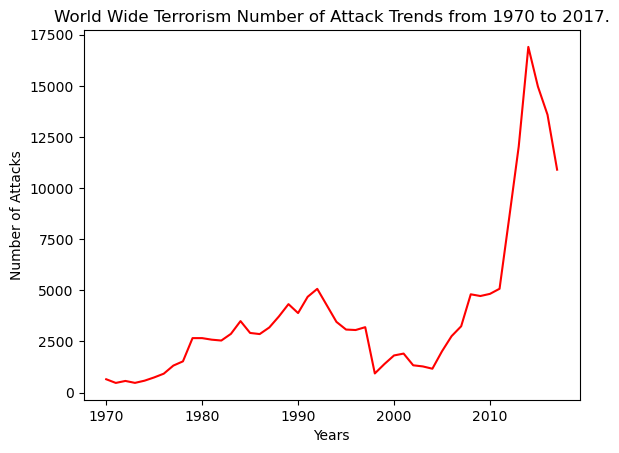

In [67]:
sns.lineplot(x='iyear', y='count', data=yearly_attacks, color= "red")
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.title('World Wide Terrorism Number of Attack Trends from 1970 to 2017.')
plt.show()

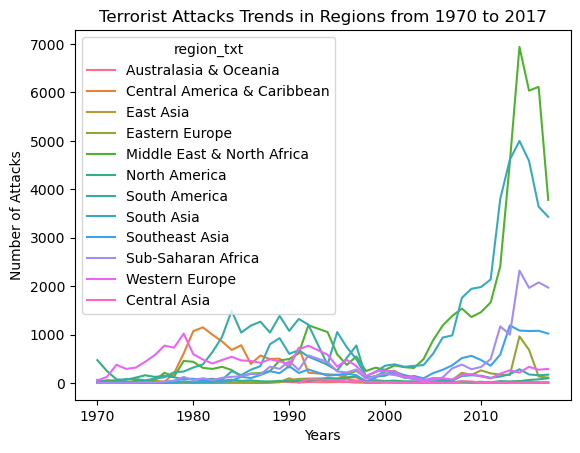

In [69]:
yearly_attacks_region = new.groupby(['iyear', 'region_txt']).size().reset_index(name='count')
sns.lineplot(x='iyear', y='count',hue='region_txt', data=yearly_attacks_region )
plt.title('Terrorist Attacks Trends in Regions from 1970 to 2017')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.show()


In [71]:
country_attacks = new.groupby('country_txt').size().reset_index(name='count').sort_values(by='count', ascending = False)
top5_country = country_attacks.head(5)

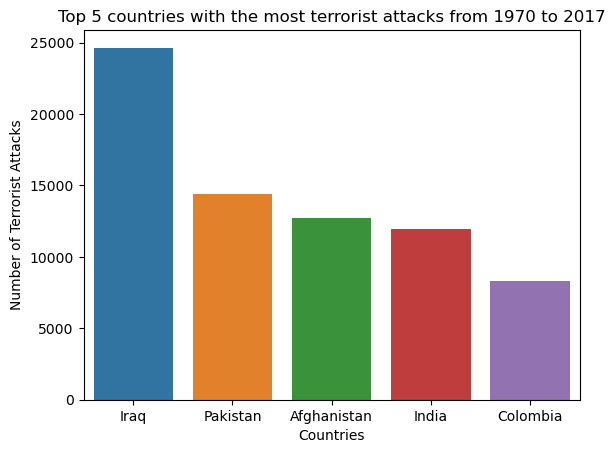

In [72]:
sns.barplot(x='country_txt', y='count', data=top5_country)
plt.title('Top 5 countries with the most terrorist attacks from 1970 to 2017')
plt.xlabel('Countries')
plt.ylabel('Number of Terrorist Attacks')
plt.show()

In [73]:
total_count = new['success'].count()
success = new.groupby('success').size().reset_index(name="count")
success['percentage'] = (success['count'] / total_count) * 100

In [74]:
success

,success,count,percentage
0,0,20059,11.040173
1,1,161632,88.959827


Text(0.5, 1.0, 'Success rate of Terrorist attacks from 2012 to 2017')

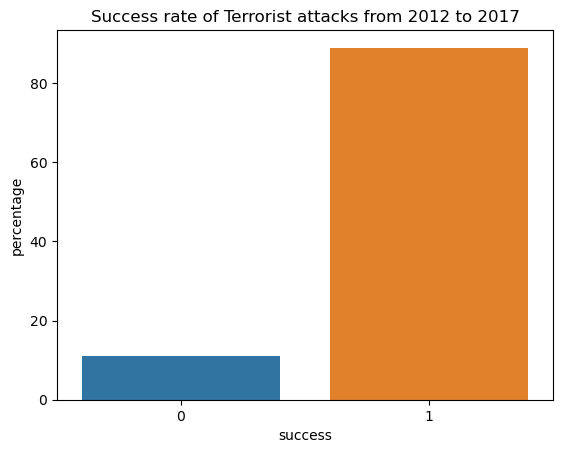

In [75]:
sns.barplot(x='success', y= 'percentage',data = success)
plt.title('Success rate of Terrorist attacks from 2012 to 2017')